<a href="https://colab.research.google.com/github/Zdenoslav/D3-visualization/blob/master/Data_Visualization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
conda install -c conda-forge plotly

SyntaxError: ignored

#**TOP 50 SPOTIFY SONGS** 
## Data analysis and visualisation


##**OVERVIEW**
- The objective of this notebook is to investigate the relationships between different variables and their impact on the popularity of the songs
- The original dataset can be obtained from the https://www.kaggle.com/leonardopena/top50spotify2019 
- In this notebook, Python packages *"plotly"* and *"seaborn"* are used to add the interactivity to the images. The modules *"numpy*" *"collections"* are also used to analyze the data.

##

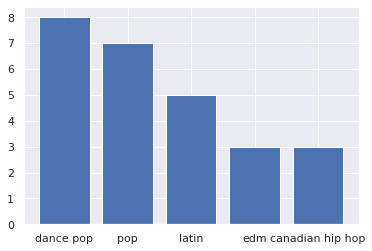

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stat
import plotly.express as px
sns.set(style="ticks", color_codes=True)
sns.set(style="darkgrid")
import plotly.graph_objects as go
import plotly.express as px
from sklearn import preprocessing
from collections import Counter
import matplotlib.pyplot as plt


bar_plot = dict(Counter(df_data['Genre'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))
plt.show()


- In this graph we can clearly see the 5 most popular genres in 2019

In [76]:
print(Counter(df_data['Artist.Name'].values))
print(Counter(df_data['Artist.Name'].values).most_common(5))

Counter({'Ed Sheeran': 4, 'Shawn Mendes': 2, 'The Chainsmokers': 2, 'Ariana Grande': 2, 'Lil Nas X': 2, 'Sech': 2, 'Marshmello': 2, 'Billie Eilish': 2, 'J Balvin': 2, 'Post Malone': 2, 'Lauv': 1, 'Jonas Brothers': 1, 'Chris Brown': 1, 'Tones and I': 1, 'Jhay Cortez': 1, 'Khalid': 1, 'DJ Snake': 1, 'Lady Gaga': 1, 'Y2K': 1, 'Kygo': 1, 'ROSALÍA': 1, 'Lewis Capaldi': 1, 'Nicky Jam': 1, 'Martin Garrix': 1, 'Katy Perry': 1, 'Young Thug': 1, 'Maluma': 1, 'Ali Gatie': 1, 'Sam Smith': 1, 'Taylor Swift': 1, 'Lizzo': 1, 'Lunay': 1, 'Daddy Yankee': 1, 'MEDUZA': 1, 'Anuel AA': 1, 'Drake': 1, 'Lil Tecca': 1, 'Bad Bunny': 1})
[('Ed Sheeran', 4), ('Shawn Mendes', 2), ('The Chainsmokers', 2), ('Ariana Grande', 2), ('Lil Nas X', 2)]


TypeError: ignored

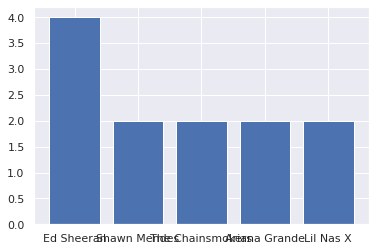

In [77]:
bar_plot = dict(Counter(df_data['Artist.Name'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))()
plt.show()

-

In [0]:
df_data = pd.read_csv('top50.csv', encoding='ISO-8859-1')


In [0]:
df_data #Coorelation of columns

In [0]:
df_data.columns = ['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence',
       'Length', 'Acousticness', 'Speechiness', 'Popularity'] ##changing the name of columns.

In [0]:

## writing a function which will scale all the required columns so, that they are in one range 0 to 1
min_max_scaler = preprocessing.MinMaxScaler()
for a in df_data.iloc[:,4:].columns:
    x = df_data[[a]].values.astype(float)
    df_data[a] = min_max_scaler.fit_transform(x)


#**THE HEAT MAP TO FIND THE RIGHT CORRELATIONS**

In [0]:
corr_matrix = df_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot =True)

- This the heatmap of correlations among different variables
- From the heatmap, we can easily see that **the Valence is negatively correlated with Popularity** whereas **Beats.Per.Minute and Speechiness are very positively correlated with Populariy**. 

##**Sorting the Artists by their Popularity**

In [0]:
df_data = df_data.sort_values(by=['Popularity'])

In [0]:
## choosing the columns which have the maximum effect on the ranking of song.

fig = go.Figure(data=[
   # go.Line(name='Energy', x=df_data['Track.Name'], y=df_data['Energy'],marker_color='rgb(117, 132, 173)'),
  #  go.Line(name='Danceability', x=df_data['Track.Name'], y=df_data['Danceability'],marker_color='rgb(49, 69, 112)'), #3
  #  go.Line(name='Liveness', x=df_data['Track.Name'], y=df_data['Liveness'],marker_color='rgb(174, 209, 214)'),#2
   # go.Line(name='Loudness', x=df_data['Track.Name'], y=df_data['Loudness'],marker_color='rgb(224, 152, 115)'),
    go.Bar(name='Valence', y=df_data['Track.Name'], x=df_data['Valence'],marker_color='rgb(163, 127, 111)', orientation = 'h', text=round(df_data['Valence'], 2)),
    go.Bar(name='Speechiness', y=df_data['Track.Name'], x=df_data['Speechiness'], orientation= 'h', text=round(df_data['Speechiness'], 2)),
    go.Bar(name='Beats.Per.Minute', y=df_data['Track.Name'], x=df_data['Beats.Per.Minute'], marker_color='rgb(117, 132, 173)', orientation = 'h', text=round(df_data['Beats.Per.Minute'], 4)),

],)
# Change the size and barmode activated, as data is too much so, we are increasing the width of data to adjust it.
fig.update_layout(
    autosize=True,
    height=2000,
    title="TOP 50 SPOTIFY SONGS",
    margin=dict(
        l=10,
        r=10,
        b=200,
        t=100,
        pad=4
    ),
    font=dict(
        family="Amiri",
        size = 18,
    
    ),
    paper_bgcolor="LightSteelBlue",
        bargap=0.4,
    barmode='stack'
)
fig.show()


- The user can easily explore the data just by moving the mouse over the columns.
- The songs are sorted by their popularity starting with the most popular song on the top
- Simply by selecting two or more graphs we can compare interactively the values of those songs

Text(0.5, 1.0, 'Relationship between Genre & Popularity')

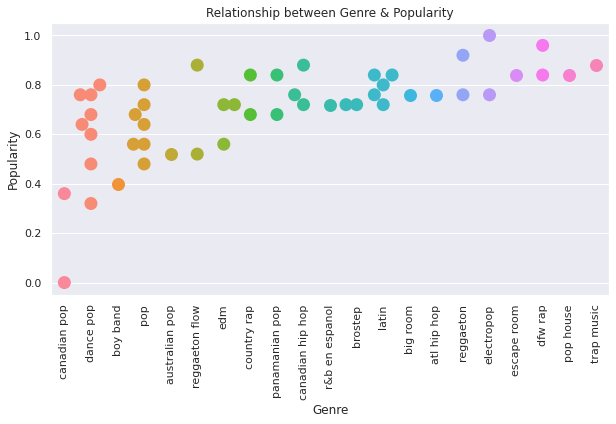

In [88]:
plt.figure(figsize=(10,5))
swarmplot=sns.swarmplot(x="Genre",y="Popularity",data=df_data, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between Genre & Popularity")


- on the x axis we have all the genres and on the y axis we can see their relationship with the popularity

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [89]:
fig = px.scatter_3d(df_data, x = 'Speechiness', y = 'Beats.Per.Minute', z = 'Valence', color='Genre')
font=dict(
        family="Amiri",
        size = 18,
    
    ),
fig.show()

In [0]:
fig.write_html("visual2.html")